# Imports

In [3]:
import pandas as pd

# Compute metadata density, etc...

In [28]:
import os
def statistics(folder_path, res):
    if not os.path.isdir(folder_path):
        print(f"Folder '{folder_path}' does not exist.")
        return
    for filename in os.listdir(folder_path):
        if filename.endswith(".dat"):
            file_path = os.path.join(folder_path, filename)
            try:
                items = set()
                line_count = 0
                nb_items_in_lines = 0
                with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
                    for line in file:
                        line = line.strip('\n')
                        x = line.split(" ")
                        
                        nb_items_in_lines  += len(x)
                        items = items.union(set(x))
                        line_count +=1
                density = (nb_items_in_lines/line_count)/len(items)
                print(f"{filename}: {len(items)} unique items, {line_count} transactions, {density} density")
                row = {
                    "File": filename, 
                    "Density": density, 
                    "Nb_unique_itemset": len(items), 
                    "Nb_transactions": line_count
                }
                res.append(row)
            except Exception as e:
                print(f"Error reading {filename}: {e}")



In [29]:
data_folder = "/Users/sushiatomique/Documents/CoursM1/ProjetApprentissage/projet-isd-cgks/src/main/resources/data"
res = []
statistics(data_folder, res)


mushroom.dat: 113 unique items, 8124 transactions, 0.19469026548672566 density
connect.dat: 130 unique items, 67557 transactions, 0.3384615384615385 density
contextPasquier99.dat: 5 unique items, 5 transactions, 0.64 density
iris.dat: 16 unique items, 150 transactions, 0.375 density
chess.dat: 76 unique items, 3196 transactions, 0.5 density
heart-cleveland.dat: 96 unique items, 296 transactions, 0.4791666666666667 density
anneal.dat: 90 unique items, 812 transactions, 0.4777777777777778 density
pumsb.dat: 2114 unique items, 49046 transactions, 0.035477767265846734 density
eisen.dat: 9839 unique items, 2464 transactions, 0.0037118715211001013 density


# Retrieve csv file and compute new csv file

In [ ]:
metadata = pd.DataFrame(res)
df = pd.read_csv("choco.csv")
tmp = df.copy()
new = pd.merge(tmp, metadata, on="File")
new.to_csv("choco_meta.csv", index=False)

# Training regressor

## Preprocessing

In [16]:
data = pd.read_csv("choco_meta.csv")

In [18]:
data.columns

Index(['Query', 'File', 'Itemset', 'Frequency', 'Duration', 'Density',
       'Nb_unique_itemset', 'Nb_transactions'],
      dtype='object')

In [19]:
data.head()

,Query,File,Itemset,Frequency,Duration,Density,Nb_unique_itemset,Nb_transactions
0,Q1,anneal.dat,9464267,0.2,15001,0.477778,90,812
1,Q2,anneal.dat,626387,0.2,6066,0.477778,90,812
2,Q3,anneal.dat,4,0.2,15142,0.477778,90,812
3,Q4,anneal.dat,12825609,0.2,15001,0.477778,90,812
4,Q5,anneal.dat,2632403,0.2,15001,0.477778,90,812


In [36]:
LABEL_NAME: str = "Lib"

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
np.random.random(df.shape[0])

array([0.57682365, 0.82608479, 0.32032946, 0.117722  ])

In [ ]:
df['Lib'] = ["choco"] 

,Query,File,Itemset,Frequency,Duration,Density,Nb_unique_itemset,Nb_transactions
0,Q1,anneal.dat,9464267,0.2,15001,0.477778,90,812
1,Q2,anneal.dat,626387,0.2,6066,0.477778,90,812
2,Q3,anneal.dat,4,0.2,15142,0.477778,90,812
3,Q4,anneal.dat,12825609,0.2,15001,0.477778,90,812
4,Q5,anneal.dat,2632403,0.2,15001,0.477778,90,812
...,...,...,...,...,...,...,...,...
319,Q5,contextPasquier99.dat,6,0.8,1,0.640000,5,5
320,Q6,contextPasquier99.dat,4,0.8,1,0.640000,5,5
321,Q7,contextPasquier99.dat,1,0.8,1,0.640000,5,5
322,Q8,contextPasquier99.dat,1,0.8,1,0.640000,5,5


Dataset shape: (324, 8)

Data types:
Query                 object
File                  object
Itemset                int64
Frequency            float64
Duration               int64
Density              float64
Nb_unique_itemset      int64
Nb_transactions        int64
dtype: object

Summary statistics:
            Itemset   Frequency      Duration     Density  Nb_unique_itemset  \
count  3.240000e+02  324.000000    324.000000  324.000000         324.000000   
mean   8.617795e+05    0.500000   6258.938272    0.338254        1386.555556   
std    2.361900e+06    0.223953   7521.811142    0.206363        3060.233687   
min    0.000000e+00    0.200000      0.000000    0.003712           5.000000   
25%    5.000000e+00    0.350000      1.000000    0.194690          76.000000   
50%    1.022000e+03    0.500000    320.000000    0.375000          96.000000   
75%    2.222320e+05    0.650000  15001.000000    0.479167         130.000000   
max    1.282561e+07    0.800000  46805.000000    0.64000

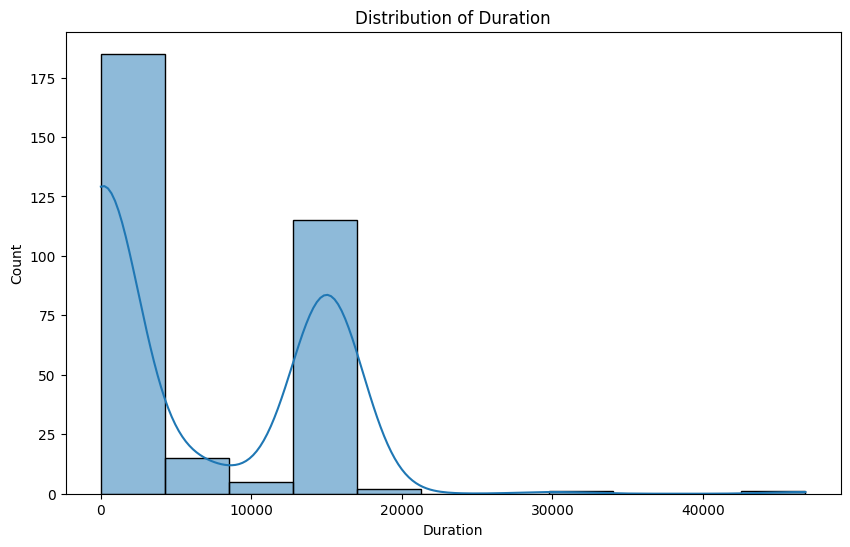

In [34]:
df = data.copy()
# Basic exploration
print("Dataset shape:", df.shape)
print("\nData types:")
print(df.dtypes)
print("\nSummary statistics:")
print(df.describe())
print("\nMissing values:")
print(df.isnull().sum())

# Visualize the target distribution
plt.figure(figsize=(10, 6))
sns.histplot(df[LABEL_NAME], kde=True)
plt.title('Distribution of Duration')
plt.show()

# Identify numerical and categorical columns
# Modify these lists according to your actual dataset
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

# Remove the target variable from features
if LABEL_NAME in numeric_features:
    numeric_features.remove(LABEL_NAME)

# Prepare features and target
X = df.drop(LABEL_NAME, axis=1)
y = df[LABEL_NAME]


In [ ]:

# Step 5: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 6: Create preprocessing pipelines for categorical and numerical data
# Numerical preprocessing: impute missing values with median and scale
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categorical preprocessing: impute missing values with most frequent and one-hot encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Step 7: Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Step 8: Create the full pipeline with a RandomForest classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Step 9: Train the model
pipeline.fit(X_train, y_train)

# Step 10: Evaluate the model
y_pred = pipeline.predict(X_test)
print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Create and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Step 11 (Optional): Hyperparameter Tuning
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(
    pipeline, 
    param_grid=param_grid, 
    cv=5, 
    n_jobs=-1, 
    verbose=1, 
    scoring='accuracy'
)

# Uncomment to run grid search (can be time-consuming)
# grid_search.fit(X_train, y_train)
# print("\nBest Parameters:", grid_search.best_params_)
# best_model = grid_search.best_estimator_
# y_pred_best = best_model.predict(X_test)
# print("Best Model Accuracy:", accuracy_score(y_test, y_pred_best))

# Step 12 (Optional): Feature Importance for Random Forest
if isinstance(pipeline.named_steps['classifier'], RandomForestClassifier):
    # Get the feature names after preprocessing
    # Note: This is a simplified approach and might need adjustment depending on your data
    feature_names = []
    
    # Get transformed feature names for numerical columns (they keep their names)
    feature_names.extend(numeric_features)
    
    # Get transformed feature names for categorical columns (they get expanded)
    # This is a simplification - actual names depend on OneHotEncoder specifics
    for col in categorical_features:
        unique_values = X_train[col].unique()
        for val in unique_values:
            feature_names.append(f"{col}_{val}")
    
    # Get feature importances
    importances = pipeline.named_steps['classifier'].feature_importances_
    
    # Match importances to feature names (take only the first len(importances) features)
    feature_importance = pd.DataFrame({
        'Feature': feature_names[:len(importances)],  # This is a simplification
        'Importance': importances
    }).sort_values('Importance', ascending=False)
    
    # Plot feature importances
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
    plt.title('Top 15 Feature Importances')
    plt.tight_layout()
    plt.show()


## Model saving

In [ ]:
# Save the best model
import joblib
joblib.dump(best_pipeline, 'models/pipeline.pkl')


In [ ]:
import joblib
import pandas as pd
import numpy as np
import os

def load_model_and_predict(model_path, data, preprocessor_path=None):
    """
    Load a saved model and make predictions on new data.
    
    Parameters:
    -----------
    model_path : str
        Path to the saved model file (.joblib or .pkl)
    data : DataFrame or array
        New data for prediction
    preprocessor_path : str, optional
        Path to saved preprocessor if separate from model
        
    Returns:
    --------
    predictions : array
        Model predictions
    probabilities : array, optional
        Prediction probabilities (if model supports predict_proba)
    """
    # Check if files exist
    if not os.path.exists(model_path):
        raise FileNotFoundError(f"Model file not found: {model_path}")
    
    if preprocessor_path and not os.path.exists(preprocessor_path):
        raise FileNotFoundError(f"Preprocessor file not found: {preprocessor_path}")
    
    # Load the model
    print(f"Loading model from {model_path}...")
    model = joblib.load(model_path)
    
    # Load preprocessor if provided
    preprocessor = None
    if preprocessor_path:
        print(f"Loading preprocessor from {preprocessor_path}...")
        preprocessor = joblib.load(preprocessor_path)
        
    # Preprocess data if needed
    if preprocessor:
        print("Preprocessing data...")
        processed_data = preprocessor.transform(data)
    else:
        processed_data = data
    
    # Make predictions
    print("Making predictions...")
    predictions = model.predict(processed_data)
    
    # Get probability scores if the model supports it
    probabilities = None
    if hasattr(model, 'predict_proba'):
        probabilities = model.predict_proba(processed_data)
    
    return predictions, probabilities

# Example usage:
if __name__ == "__main__":
    # Path to your saved model and preprocessor
    MODEL_DIR = "models/"
    model_path = os.path.join(MODEL_DIR, "classifier.pkl")
    preprocessor_path = os.path.join(MODEL_DIR, "preprocessor.pkl")
    
    # Load your new data (replace with your actual data loading)
    new_data = pd.read_csv("new_data.csv")
    
    # If your target column is in the data, remove it
    if 'target_column' in new_data.columns:
        X_new = new_data.drop('target_column', axis=1)
    else:
        X_new = new_data
    
    # Make predictions
    predictions, probabilities = load_model_and_predict(
        model_path=model_path,
        data=X_new,
        preprocessor_path=preprocessor_path
    )
    
    # Display results
    print("\nPredictions:")
    print(predictions[:10])  # First 10 predictions
    
    if probabilities is not None:
        print("\nProbabilities (first 5 samples):")
        for i, prob in enumerate(probabilities[:5]):
            print(f"Sample {i+1}: {prob}")
    
    # Add predictions to the original data
    new_data['predicted_class'] = predictions
    
    # If there are probability scores and it's a binary classification
    if probabilities is not None and probabilities.shape[1] == 2:
        new_data['probability_score'] = probabilities[:, 1]  # Probability of class 1
    
    # Save results to CSV (optional)
    results_path = "prediction_results.csv"
    print(f"\nSaving results to {results_path}")
    new_data.to_csv(results_path, index=False)
    
    print("Prediction process completed!")
